In [49]:
import pandas as pd

data = pd.read_csv("Life Expectancy Data.csv")

data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [50]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [51]:
# Remove trailing whitespaces from column names
data.columns = data.columns.str.strip()

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [53]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [54]:
# Deal with missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

num_cols = data.select_dtypes(exclude= 'O').columns
filtered_data = data
filtered_data[num_cols] = imputer.fit_transform(data[num_cols])

filtered_data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [55]:
filtered_data.shape

(2938, 22)

In [56]:
filtered_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


C:\Users\gerja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gerja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


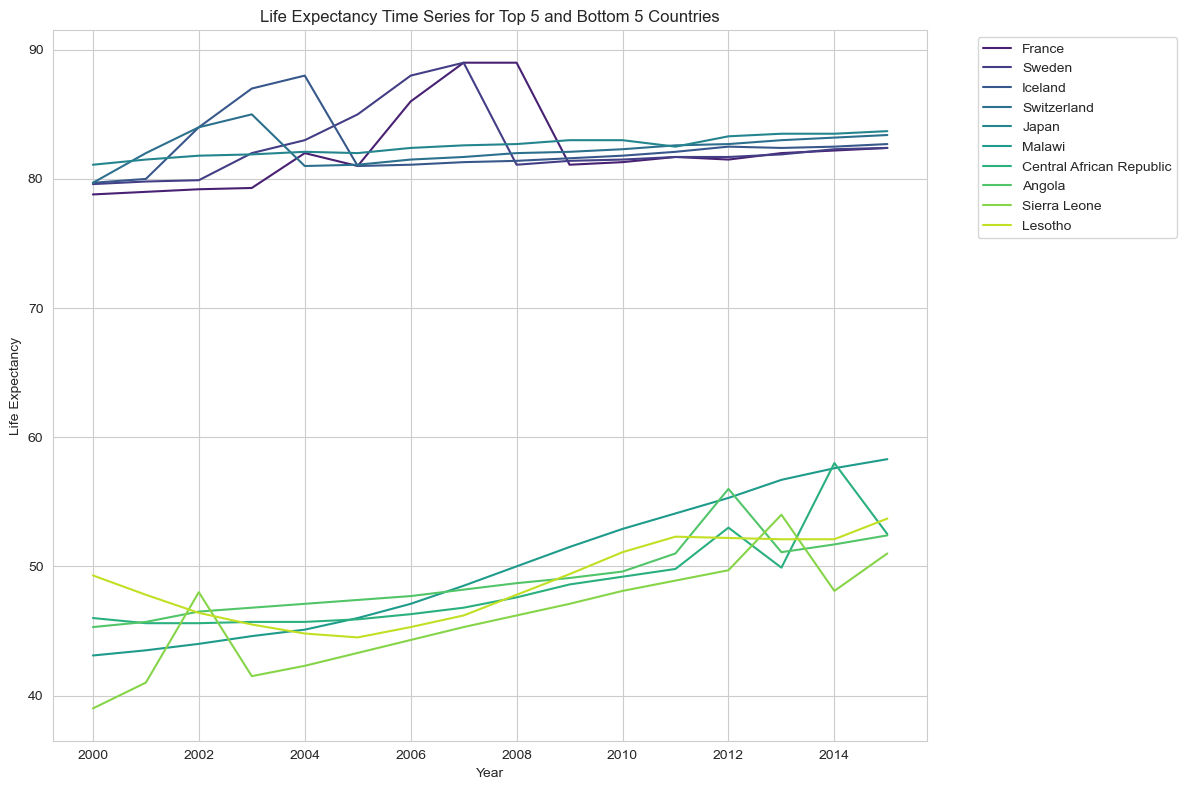

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean life expectancy for each country
df_agg = filtered_data.groupby(['Country', 'Year'])['Life expectancy'].mean().reset_index()

# Sort the DataFrame based on the mean life expectancy
df_agg_sorted = df_agg.sort_values(by='Life expectancy', ascending=False)

# Extract top 5 and bottom 5 countries
top_5_countries = df_agg_sorted.groupby('Country').mean().nlargest(5, 'Life expectancy').index
bottom_5_countries = df_agg_sorted.groupby('Country').mean().nsmallest(5, 'Life expectancy').index

# Filter the DataFrame to include only top 5 and bottom 5 countries
df_top_bottom = df_agg_sorted[df_agg_sorted['Country'].isin(top_5_countries) | df_agg_sorted['Country'].isin(bottom_5_countries)]

# Set a color palette with distinct colors
palette = sns.color_palette("husl", len(df_top_bottom['Country'].unique()))

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Life expectancy', hue='Country', data=df_top_bottom, palette='viridis')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Time Series for Top 5 and Bottom 5 Countries')

# Show legend outside plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


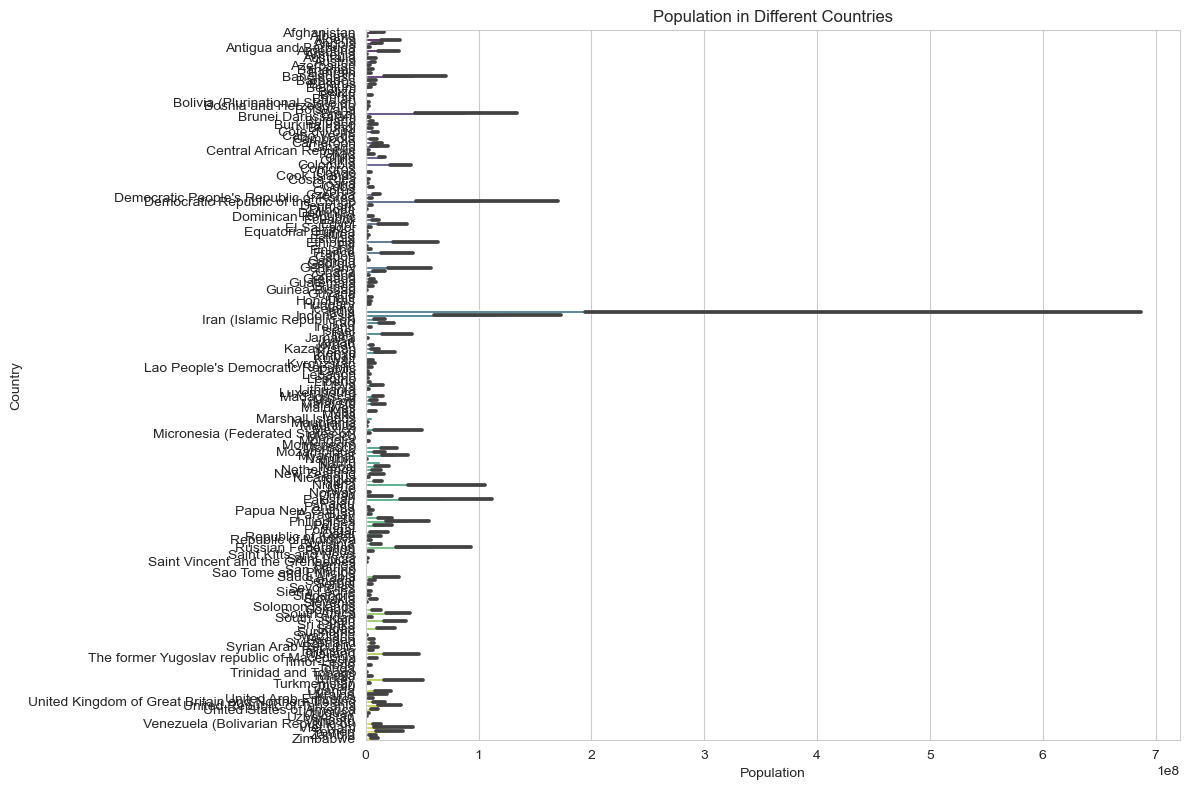

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Population', y='Country', data=filtered_data, palette='viridis')

# Set labels and title
plt.xlabel('Population')
plt.ylabel('Country')
plt.title('Population in Different Countries')

# Show plot
plt.tight_layout()
plt.show()


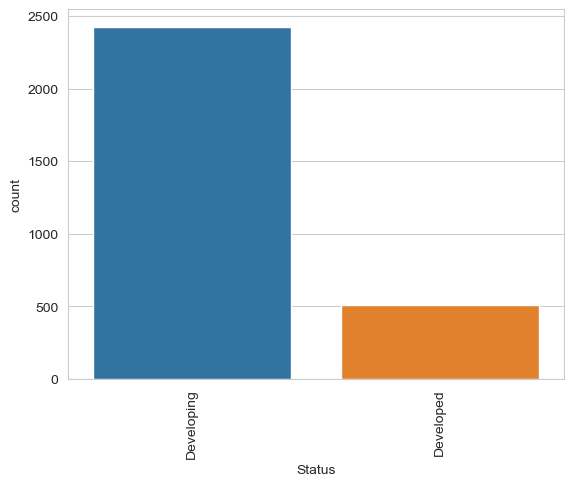

In [59]:
sns.countplot(x='Status', data=filtered_data,capsize=0)
plt.xticks(rotation=90)
plt.show()

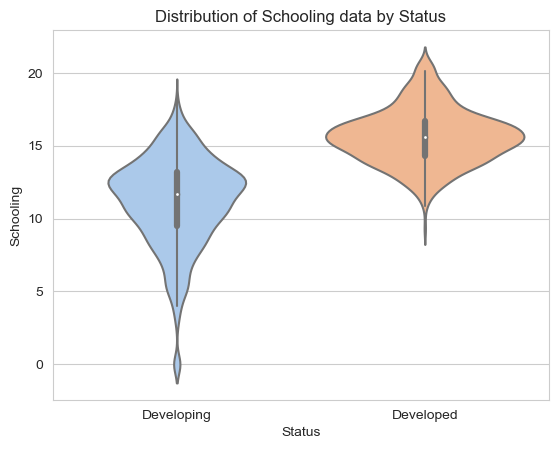

In [61]:
sns.violinplot(data=filtered_data, x='Status', y='Schooling', palette='pastel')

# Set plot title and labels
plt.title('Distribution of Schooling data by Status')
plt.xlabel('Status')
plt.ylabel('Schooling')

# Display the plot
plt.show()

In [13]:
filtered_data = pd.get_dummies(filtered_data, columns=['Status'])
filtered_data = filtered_data.drop(columns = 'Country')
filtered_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True


In [29]:
from sklearn.model_selection import train_test_split

X = filtered_data.drop('Life expectancy', axis=1).values
y = filtered_data['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

score = lin_reg.score(X_test, y_test)

print(f"Score:  {score}")

y_pred = lin_reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:5], y_test[:5]))


Score:  0.8357861997510714
Predictions: [67.8163954  76.80183847 75.05605066 77.98013642 47.76407012], Actual Values: 2546    73.7
650     75.9
1740    74.2
177     76.8
1377    51.9
Name: Life expectancy, dtype: float64


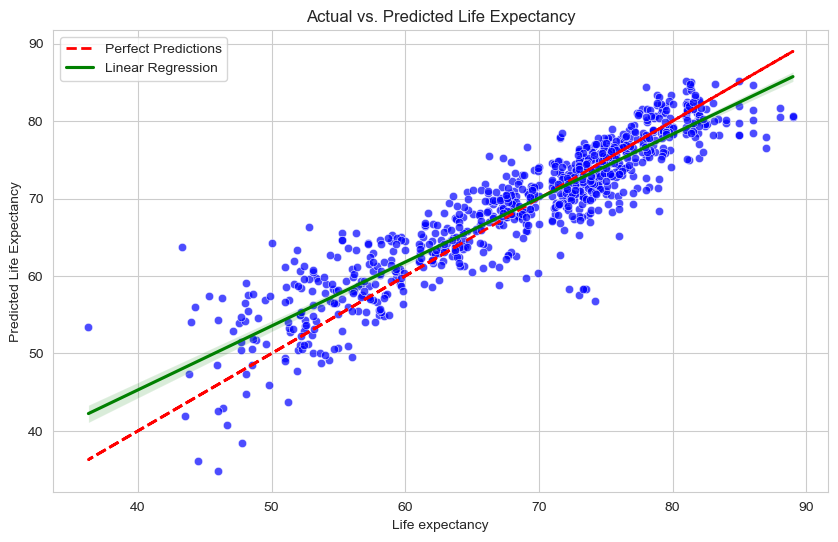

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs. Predicted Life Expectancy')

# Add a line representing perfect predictions
plt.plot(y_test, y_test, color='red', linestyle='--', linewidth=2, label='Perfect Predictions')

# Add linear regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='green', label='Linear Regression')

plt.legend()
plt.show()


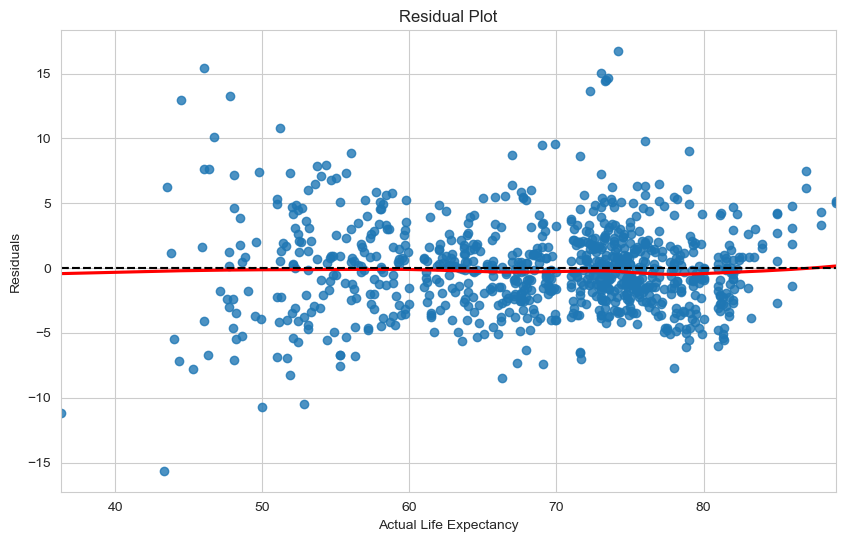

In [35]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

C:\Users\gerja\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.392e+04, tolerance: 2.658e+01
  model = cd_fast.enet_coordinate_descent(


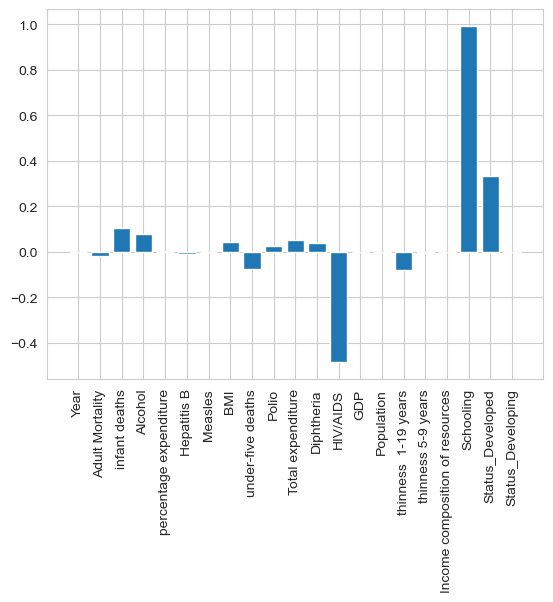

In [36]:
# Feature importance

from sklearn.linear_model import Lasso
X = filtered_data.drop('Life expectancy', axis=1).values
y = filtered_data['Life expectancy'].values
names = filtered_data.drop('Life expectancy', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [38]:
#Ridge
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0) 
ridge_reg.fit(X_train, y_train)
ridge_score = ridge_reg.score(X_test, y_test)
ridge_score

C:\Users\gerja\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.40061e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.8358051000330954

In [39]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)  
lasso_reg.fit(X_train, y_train)
lasso_score = lasso_reg.score(X_test, y_test)
lasso_score

C:\Users\gerja\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.651e+04, tolerance: 1.830e+01
  model = cd_fast.enet_coordinate_descent(


0.8280164129060429

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train, y_train)
tree_score = tree_reg.score(X_test, y_test)
tree_score

0.8821965076926579

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, max_depth=5)  
forest_reg.fit(X_train, y_train)
forest_score = forest_reg.score(X_test, y_test)
forest_score

0.9286977571090572

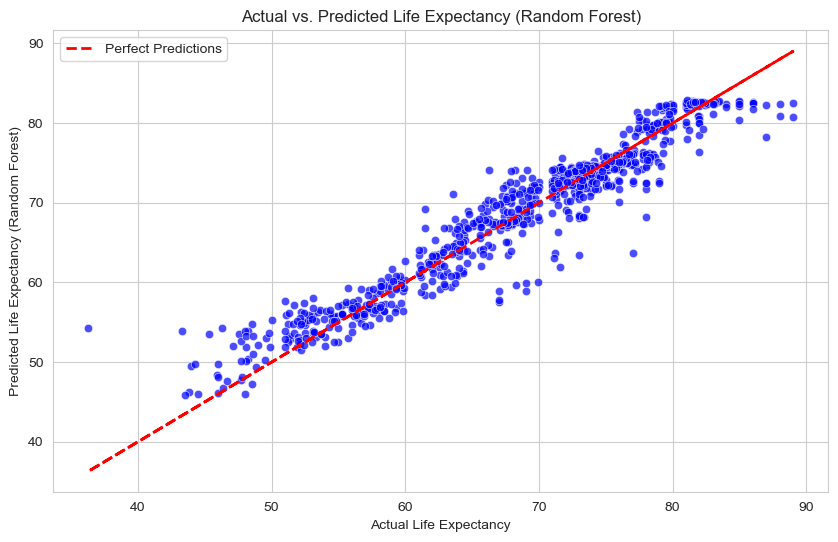

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_forest, color='blue', alpha=0.7)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy (Random Forest)')
plt.title('Actual vs. Predicted Life Expectancy (Random Forest)')

# Add a line representing perfect predictions
plt.plot(y_test, y_test, color='red', linestyle='--', linewidth=2, label='Perfect Predictions')

plt.legend()
plt.show()

